In [18]:
# Question 1 (a)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict using KNN classifier
y_pred_knn = knn.predict(X_test)

# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict using Decision Tree classifier
y_pred_dt = dt.predict(X_test)

# Train SVM classifier
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)

# Predict using SVM classifier
y_pred_svm = svm.predict(X_test)

# Compute accuracy, precision, recall, and F1 score for each classifier
print("KNN classifier performance:")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Precision score: {:.2f}".format(precision_score(y_test, y_pred_knn, average='weighted')))
print("Recall score: {:.2f}".format(recall_score(y_test, y_pred_knn, average='weighted')))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred_knn, average='weighted')))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_knn))

print("\nDecision Tree classifier performance:")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("Precision score: {:.2f}".format(precision_score(y_test, y_pred_dt, average='weighted')))
print("Recall score: {:.2f}".format(recall_score(y_test, y_pred_dt, average='weighted')))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred_dt, average='weighted')))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\nSVM classifier performance:")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Precision score: {:.2f}".format(precision_score(y_test, y_pred_svm, average='weighted')))
print("Recall score: {:.2f}".format(recall_score(y_test, y_pred_svm, average='weighted')))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred_svm, average='weighted')))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))


KNN classifier performance:
Accuracy score: 0.97
Precision score: 0.97
Recall score: 0.97
F1 score: 0.97
Confusion matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Decision Tree classifier performance:
Accuracy score: 1.00
Precision score: 1.00
Recall score: 1.00
F1 score: 1.00
Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

SVM classifier performance:
Accuracy score: 1.00
Precision score: 1.00
Recall score: 1.00
F1 score: 1.00
Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


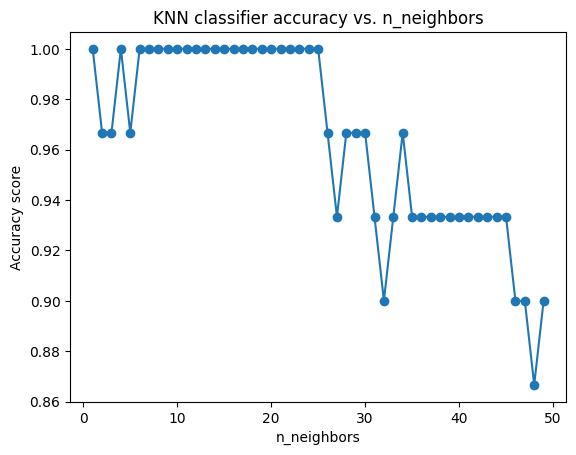

In [21]:
# Question 1 (b)
import matplotlib.pyplot as plt

# Test KNN classifier with different values of n_neighbors
neighbors = range(1, 50)
accuracy_scores = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy scores vs. n_neighbors
plt.plot(neighbors, accuracy_scores, 'o-')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy score')
plt.title('KNN classifier accuracy vs. n_neighbors')
plt.show()


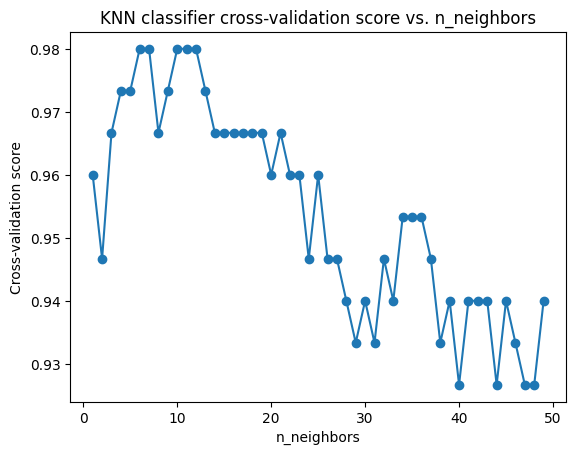

In [22]:
# Question 1 (b) Cross-Validation
from sklearn.model_selection import cross_val_score

# Evaluate KNN classifier with different values of n_neighbors using cross-validation
cv_scores = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())

# Plot cross-validation scores vs. n_neighbors
plt.plot(neighbors, cv_scores, 'o-')
plt.xlabel('n_neighbors')
plt.ylabel('Cross-validation score')
plt.title('KNN classifier cross-validation score vs. n_neighbors')
plt.show()


In [5]:
# Question 1 (c)
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create an SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = svm.predict(X_test)

# Evaluate the performance of the classifier
print("Accuracy score:", accuracy_score(y_test, y_pred))


Accuracy score: 1.0


In [3]:
# Question 1 (d) Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

knn = KNeighborsClassifier(n_neighbors=3)

%timeit knn.fit(X, y)
%timeit knn.predict(X)


2.02 ms ± 655 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.5 ms ± 960 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
# Question 1 (d) Svm Classifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

svm = SVC(kernel='linear', C=1.0, random_state=42)

%timeit svm.fit(X, y)
%timeit svm.predict(X)


2.09 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
477 µs ± 35.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
